In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt

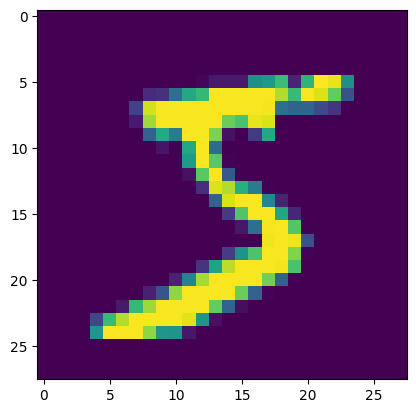

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.axis('off')
plt.imshow(X_train[0])

In [3]:
y_df = pd.DataFrame(y_train)
y_df.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [4]:
X_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

model.fit(X_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1628 - accuracy: 0.9523
Epoch 2/4
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0556 - accuracy: 0.9831
Epoch 3/4
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0365 - accuracy: 0.9889
Epoch 4/4
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0250 - accuracy: 0.9919


In [8]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0430 - accuracy: 0.9850


[0.04295017197728157, 0.9850000143051147]

313/313 [==============================] - 1s 4ms/step
6


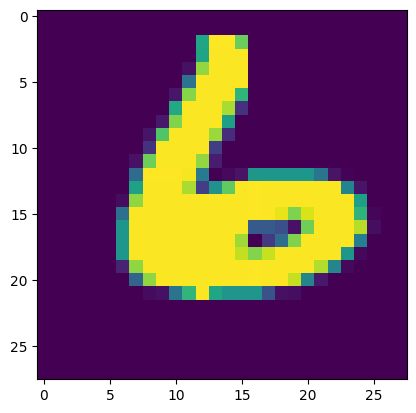

In [9]:
y_pred = model.predict(X_test)
y_pred_nums = np.argmax(y_pred, axis=1)
rand_num = np.random.randint(0, X_test.shape[0])
print(y_pred_nums[rand_num])
plt.axis('off')
plt.imshow(X_test[rand_num])

Text(95.72222222222221, 0.5, 'Truth')

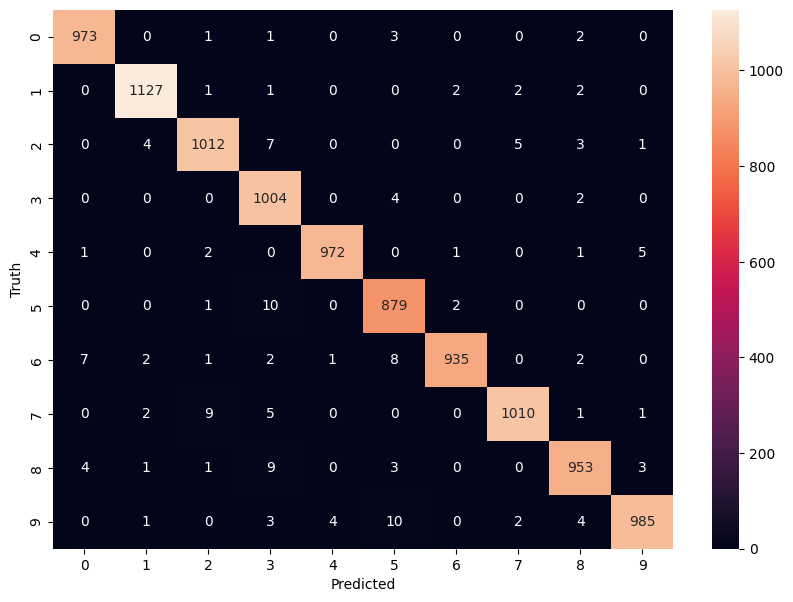

In [10]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_nums)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')